In [1]:
from autometrics.dataset.datasets.simplification import SimpDA
from autometrics.util.analysis import display_top_5_metrics_by_validation, get_top_metric_by_validation, plot_metric_target_scatterplot
from autometrics.evaluate.correlation import calculate_correlation
from autometrics.aggregator.regression import Ridge
from autometrics.generator.LLMJudgeProposer import LLMJudgeProposer
from autometrics.metrics.MetricBank import all_metrics
import dspy
import pandas as pd
pd.set_option('display.max_colwidth', None)

import litellm

litellm.suppress_debug_info = True

/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = SimpDA()

In [3]:
dataset.add_metrics(all_metrics)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 41/41 [01:52<00:00,  2.75s/it]


computing greedy matching.


100%|██████████| 68/68 [00:00<00:00, 91.98it/s]


done in 113.50 seconds, 38.24 sentences/sec


In [4]:
train, dev, test = dataset.get_splits(train_ratio=0.2, val_ratio=0.3, seed=42)

In [5]:
llama31_70b = dspy.LM("openai/meta-llama/Meta-Llama-3-70b-Instruct", api_base="http://future-hgx-1:7410/v1", api_key="None")

dspy.settings.configure(lm=llama31_70b)

In [6]:
llama31_70b.model

'openai/meta-llama/Meta-Llama-3-70b-Instruct'

In [7]:
from autometrics.metrics.llm_judge.LLMJudgeNormalizeOptimized import LLMJudgeNormalizeOptimized

In [8]:
for target_column in dataset.target_columns:
    new_metric = LLMJudgeNormalizeOptimized(
        name=target_column + "_" + llama31_70b.model.split('/')[-1], 
        description="Optimized LLM as a judge for " + target_column, 
        model=llama31_70b,
        train_dataset=train,
        task_description="Given a complicated original sentence, simplify it in a way such that a broader audience could easily understand it.",
        target_column=target_column,
        output_prompt_path='simpda_normalized_' + target_column + '_prompt.dspy',
        metric_name=target_column,
    )

    train.add_metrics([new_metric])
    dev.add_metrics([new_metric])
    test.add_metrics([new_metric])


RUNNING WITH THE FOLLOWING MEDIUM AUTO RUN SETTINGS:
num_trials: 25
minibatch: True
num_candidates: 19
valset size: 65


==> STEP 1: BOOTSTRAP FEWSHOT EXAMPLES <==
These will be used as few-shot example candidates for our program and for creating instructions.

Bootstrapping N=19 sets of demonstrations...
Bootstrapping set 1/19
Bootstrapping set 2/19
Bootstrapping set 3/19


 47%|████▋     | 8/17 [00:00<00:00, 86.16it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 4/19


 18%|█▊        | 3/17 [00:00<00:00, 267.86it/s]


Bootstrapped 3 full traces after 4 examples in round 0.
Bootstrapping set 5/19


 35%|███▌      | 6/17 [00:00<00:00, 173.60it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 6/19


  6%|▌         | 1/17 [00:00<00:00, 208.82it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 7/19


 47%|████▋     | 8/17 [00:00<00:00, 237.66it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 8/19


 18%|█▊        | 3/17 [00:00<00:00, 292.94it/s]

Bootstrapped 3 full traces after 4 examples in round 0.
Bootstrapping set 9/19



  6%|▌         | 1/17 [00:00<00:00, 243.84it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 10/19


 41%|████      | 7/17 [00:00<00:00, 259.64it/s]


Bootstrapped 7 full traces after 8 examples in round 0.
Bootstrapping set 11/19


  6%|▌         | 1/17 [00:00<00:00, 292.82it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 12/19


  6%|▌         | 1/17 [00:00<00:00, 300.30it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 13/19


 47%|████▋     | 8/17 [00:00<00:00, 97.27it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 14/19


 24%|██▎       | 4/17 [00:00<00:00, 200.59it/s]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 15/19


  6%|▌         | 1/17 [00:00<00:00, 239.35it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 16/19


 18%|█▊        | 3/17 [00:00<00:00, 213.48it/s]


Bootstrapped 3 full traces after 4 examples in round 0.
Bootstrapping set 17/19


  6%|▌         | 1/17 [00:00<00:00, 327.55it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 18/19


  6%|▌         | 1/17 [00:00<00:00, 357.66it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 19/19


 29%|██▉       | 5/17 [00:00<00:00, 198.97it/s]


Bootstrapped 5 full traces after 6 examples in round 0.

==> STEP 2: PROPOSE INSTRUCTION CANDIDATES <==
We will use the few-shot examples from the previous step, a generated dataset summary, a summary of the program code, and a randomly selected prompting tip to propose instructions.

Proposing instructions...

Proposed Instructions for Predictor 0:

0: Given an input text, the task description that the model was trying to follow, and a metric to rate the text on, return a score from 1-5 on this metric.

1: Evaluate the quality of the given text based on the provided task description and metric. Provide a score from 1-5, along with a clear and concise reasoning for the assigned score, explaining how the text meets or fails to meet the requirements of the task and metric.

2: Evaluate the fluency of a simplified sentence by comparing it to its original complicated sentence and multiple reference sentences. Consider how well the simplified sentence preserves the original meaning and is e

Average Metric: 41.166666666666664 / 65  (63.3): 100%|██████████| 65/65 [00:00<00:00, 327.84it/s]
/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/optuna/_experimental.py:30: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(


Default program score: 63.33

==> STEP 3: FINDING OPTIMAL PROMPT PARAMETERS <==
We will evaluate the program over a series of trials with different combinations of instructions and few-shot examples to find the optimal combination using Bayesian Optimization.

== Minibatch Trial 1 / 25 ==


Average Metric: 16.833333333333336 / 25  (67.3): 100%|██████████| 25/25 [00:00<00:00, 280.75it/s]

Score: 67.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 12', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [67.33]
Full eval scores so far: [63.33]
Best full score so far: 63.33


== Minibatch Trial 2 / 25 ==



Average Metric: 17.916666666666668 / 25  (71.7): 100%|██████████| 25/25 [00:00<00:00, 243.51it/s]


Score: 71.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 10', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [67.33, 71.67]
Full eval scores so far: [63.33]
Best full score so far: 63.33


== Minibatch Trial 3 / 25 ==


Average Metric: 16.916666666666668 / 25  (67.7): 100%|██████████| 25/25 [00:00<00:00, 247.41it/s]


Score: 67.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [67.33, 71.67, 67.67]
Full eval scores so far: [63.33]
Best full score so far: 63.33


== Minibatch Trial 4 / 25 ==


Average Metric: 15.16666666666667 / 25  (60.7): 100%|██████████| 25/25 [00:00<00:00, 846.43it/s] 


Score: 60.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 15', 'Predictor 1: Few-Shot Set 2'].
Minibatch scores so far: [67.33, 71.67, 67.67, 60.67]
Full eval scores so far: [63.33]
Best full score so far: 63.33


== Minibatch Trial 5 / 25 ==


Average Metric: 16.5 / 25  (66.0): 100%|██████████| 25/25 [00:00<00:00, 165.41it/s]             


Score: 66.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 8', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [67.33, 71.67, 67.67, 60.67, 66.0]
Full eval scores so far: [63.33]
Best full score so far: 63.33


== Minibatch Trial 6 / 25 ==


Average Metric: 18.916666666666664 / 25  (75.7): 100%|██████████| 25/25 [00:00<00:00, 228.41it/s]


Score: 75.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [67.33, 71.67, 67.67, 60.67, 66.0, 75.67]
Full eval scores so far: [63.33]
Best full score so far: 63.33


== Minibatch Trial 7 / 25 ==


Average Metric: 15.0 / 25  (60.0): 100%|██████████| 25/25 [00:00<00:00, 589.37it/s]              


Score: 60.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 12'].
Minibatch scores so far: [67.33, 71.67, 67.67, 60.67, 66.0, 75.67, 60.0]
Full eval scores so far: [63.33]
Best full score so far: 63.33


== Minibatch Trial 8 / 25 ==


Average Metric: 16.083333333333336 / 25  (64.3): 100%|██████████| 25/25 [00:00<00:00, 324.11it/s]


Score: 64.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [67.33, 71.67, 67.67, 60.67, 66.0, 75.67, 60.0, 64.33]
Full eval scores so far: [63.33]
Best full score so far: 63.33


== Minibatch Trial 9 / 25 ==


Average Metric: 16.666666666666664 / 25  (66.7): 100%|██████████| 25/25 [00:00<00:00, 210.81it/s]


Score: 66.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 5', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [67.33, 71.67, 67.67, 60.67, 66.0, 75.67, 60.0, 64.33, 66.67]
Full eval scores so far: [63.33]
Best full score so far: 63.33


== Minibatch Trial 10 / 25 ==


Average Metric: 15.250000000000002 / 25  (61.0): 100%|██████████| 25/25 [00:00<00:00, 316.80it/s]


Score: 61.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 14', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [67.33, 71.67, 67.67, 60.67, 66.0, 75.67, 60.0, 64.33, 66.67, 61.0]
Full eval scores so far: [63.33]
Best full score so far: 63.33


===== Full Eval 1 =====
Doing full eval on next top averaging program (Avg Score: 75.67) from minibatch trials...


Average Metric: 40.75 / 65  (62.7): 100%|██████████| 65/65 [00:00<00:00, 456.25it/s]            

Full eval scores so far: [63.33, 62.69]


Best full score so far: 63.33


== Minibatch Trial 11 / 25 ==


Average Metric: 15.333333333333334 / 25  (61.3): 100%|██████████| 25/25 [00:00<00:00, 314.98it/s]


Score: 61.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 3', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [67.33, 71.67, 67.67, 60.67, 66.0, 75.67, 60.0, 64.33, 66.67, 61.0, 61.33]
Full eval scores so far: [63.33, 62.69]
Best full score so far: 63.33


== Minibatch Trial 12 / 25 ==


Average Metric: 16.083333333333336 / 25  (64.3): 100%|██████████| 25/25 [00:00<00:00, 177.88it/s]


Score: 64.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 10', 'Predictor 1: Few-Shot Set 2'].
Minibatch scores so far: [67.33, 71.67, 67.67, 60.67, 66.0, 75.67, 60.0, 64.33, 66.67, 61.0, 61.33, 64.33]
Full eval scores so far: [63.33, 62.69]
Best full score so far: 63.33


== Minibatch Trial 13 / 25 ==


Average Metric: 15.250000000000002 / 25  (61.0): 100%|██████████| 25/25 [00:00<00:00, 2172.76it/s]


Score: 61.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [67.33, 71.67, 67.67, 60.67, 66.0, 75.67, 60.0, 64.33, 66.67, 61.0, 61.33, 64.33, 61.0]
Full eval scores so far: [63.33, 62.69]
Best full score so far: 63.33


== Minibatch Trial 14 / 25 ==


Average Metric: 16.083333333333336 / 25  (64.3): 100%|██████████| 25/25 [00:00<00:00, 309.00it/s]


Score: 64.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 10', 'Predictor 1: Few-Shot Set 15'].
Minibatch scores so far: [67.33, 71.67, 67.67, 60.67, 66.0, 75.67, 60.0, 64.33, 66.67, 61.0, 61.33, 64.33, 61.0, 64.33]
Full eval scores so far: [63.33, 62.69]
Best full score so far: 63.33


== Minibatch Trial 15 / 25 ==


Average Metric: 15.666666666666666 / 25  (62.7): 100%|██████████| 25/25 [00:00<00:00, 531.92it/s]


Score: 62.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 0', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [67.33, 71.67, 67.67, 60.67, 66.0, 75.67, 60.0, 64.33, 66.67, 61.0, 61.33, 64.33, 61.0, 64.33, 62.67]
Full eval scores so far: [63.33, 62.69]
Best full score so far: 63.33


== Minibatch Trial 16 / 25 ==


Average Metric: 17.75 / 25  (71.0): 100%|██████████| 25/25 [00:00<00:00, 1183.32it/s]            


Score: 71.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 10', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [67.33, 71.67, 67.67, 60.67, 66.0, 75.67, 60.0, 64.33, 66.67, 61.0, 61.33, 64.33, 61.0, 64.33, 62.67, 71.0]
Full eval scores so far: [63.33, 62.69]
Best full score so far: 63.33


== Minibatch Trial 17 / 25 ==


Average Metric: 16.166666666666668 / 25  (64.7): 100%|██████████| 25/25 [00:00<00:00, 176.94it/s]


Score: 64.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 13', 'Predictor 1: Few-Shot Set 10'].
Minibatch scores so far: [67.33, 71.67, 67.67, 60.67, 66.0, 75.67, 60.0, 64.33, 66.67, 61.0, 61.33, 64.33, 61.0, 64.33, 62.67, 71.0, 64.67]
Full eval scores so far: [63.33, 62.69]
Best full score so far: 63.33


== Minibatch Trial 18 / 25 ==


Average Metric: 17.25 / 25  (69.0): 100%|██████████| 25/25 [00:00<00:00, 645.99it/s]            


Score: 69.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 1', 'Predictor 1: Few-Shot Set 6'].
Minibatch scores so far: [67.33, 71.67, 67.67, 60.67, 66.0, 75.67, 60.0, 64.33, 66.67, 61.0, 61.33, 64.33, 61.0, 64.33, 62.67, 71.0, 64.67, 69.0]
Full eval scores so far: [63.33, 62.69]
Best full score so far: 63.33


== Minibatch Trial 19 / 25 ==


Average Metric: 17.583333333333336 / 25  (70.3): 100%|██████████| 25/25 [00:00<00:00, 869.13it/s]


Score: 70.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 0'].
Minibatch scores so far: [67.33, 71.67, 67.67, 60.67, 66.0, 75.67, 60.0, 64.33, 66.67, 61.0, 61.33, 64.33, 61.0, 64.33, 62.67, 71.0, 64.67, 69.0, 70.33]
Full eval scores so far: [63.33, 62.69]
Best full score so far: 63.33


== Minibatch Trial 20 / 25 ==


Average Metric: 17.083333333333336 / 25  (68.3): 100%|██████████| 25/25 [00:00<00:00, 654.73it/s]


Score: 68.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 14', 'Predictor 1: Few-Shot Set 16'].
Minibatch scores so far: [67.33, 71.67, 67.67, 60.67, 66.0, 75.67, 60.0, 64.33, 66.67, 61.0, 61.33, 64.33, 61.0, 64.33, 62.67, 71.0, 64.67, 69.0, 70.33, 68.33]
Full eval scores so far: [63.33, 62.69]
Best full score so far: 63.33


===== Full Eval 2 =====
Doing full eval on next top averaging program (Avg Score: 71.33500000000001) from minibatch trials...


Average Metric: 45.666666666666664 / 65  (70.3): 100%|██████████| 65/65 [00:00<00:00, 634.47it/s]


New best full eval score! Score: 70.26
Full eval scores so far: [63.33, 62.69, 70.26]
Best full score so far: 70.26


== Minibatch Trial 21 / 25 ==


Average Metric: 16.75 / 25  (67.0): 100%|██████████| 25/25 [00:00<00:00, 201.47it/s]            


Score: 67.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 9', 'Predictor 1: Few-Shot Set 14'].
Minibatch scores so far: [67.33, 71.67, 67.67, 60.67, 66.0, 75.67, 60.0, 64.33, 66.67, 61.0, 61.33, 64.33, 61.0, 64.33, 62.67, 71.0, 64.67, 69.0, 70.33, 68.33, 67.0]
Full eval scores so far: [63.33, 62.69, 70.26]
Best full score so far: 70.26


== Minibatch Trial 22 / 25 ==


Average Metric: 16.75 / 25  (67.0): 100%|██████████| 25/25 [00:00<00:00, 315.74it/s]             


Score: 67.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 10', 'Predictor 1: Few-Shot Set 3'].
Minibatch scores so far: [67.33, 71.67, 67.67, 60.67, 66.0, 75.67, 60.0, 64.33, 66.67, 61.0, 61.33, 64.33, 61.0, 64.33, 62.67, 71.0, 64.67, 69.0, 70.33, 68.33, 67.0, 67.0]
Full eval scores so far: [63.33, 62.69, 70.26]
Best full score so far: 70.26


== Minibatch Trial 23 / 25 ==


Average Metric: 16.333333333333336 / 25  (65.3): 100%|██████████| 25/25 [00:00<00:00, 5036.15it/s]


Score: 65.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 10', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [67.33, 71.67, 67.67, 60.67, 66.0, 75.67, 60.0, 64.33, 66.67, 61.0, 61.33, 64.33, 61.0, 64.33, 62.67, 71.0, 64.67, 69.0, 70.33, 68.33, 67.0, 67.0, 65.33]
Full eval scores so far: [63.33, 62.69, 70.26]
Best full score so far: 70.26


== Minibatch Trial 24 / 25 ==


Average Metric: 16.333333333333336 / 25  (65.3): 100%|██████████| 25/25 [00:00<00:00, 531.19it/s]


Score: 65.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 18', 'Predictor 1: Few-Shot Set 9'].
Minibatch scores so far: [67.33, 71.67, 67.67, 60.67, 66.0, 75.67, 60.0, 64.33, 66.67, 61.0, 61.33, 64.33, 61.0, 64.33, 62.67, 71.0, 64.67, 69.0, 70.33, 68.33, 67.0, 67.0, 65.33, 65.33]
Full eval scores so far: [63.33, 62.69, 70.26]
Best full score so far: 70.26


== Minibatch Trial 25 / 25 ==


Average Metric: 16.166666666666664 / 25  (64.7): 100%|██████████| 25/25 [00:00<00:00, 192.39it/s]


Score: 64.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 17', 'Predictor 1: Few-Shot Set 17'].
Minibatch scores so far: [67.33, 71.67, 67.67, 60.67, 66.0, 75.67, 60.0, 64.33, 66.67, 61.0, 61.33, 64.33, 61.0, 64.33, 62.67, 71.0, 64.67, 69.0, 70.33, 68.33, 67.0, 67.0, 65.33, 65.33, 64.67]
Full eval scores so far: [63.33, 62.69, 70.26]
Best full score so far: 70.26


===== Full Eval 3 =====
Doing full eval on next top averaging program (Avg Score: 70.33) from minibatch trials...


Average Metric: 44.08333333333333 / 65  (67.8): 100%|██████████| 65/65 [00:00<00:00, 697.84it/s] 


Full eval scores so far: [63.33, 62.69, 70.26, 67.82]
Best full score so far: 70.26


Returning best identified program with score 70.26!


Grading rows:   0%|          | 0/82 [00:00<?, ?row/s]/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeNormalizeOptimized.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[index, metric_name] = score
Grading rows:   0%|          | 0/153 [00:00<?, ?row/s]/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeNormalizeOptimized.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[index, metr


RUNNING WITH THE FOLLOWING MEDIUM AUTO RUN SETTINGS:
num_trials: 25
minibatch: True
num_candidates: 19
valset size: 65


==> STEP 1: BOOTSTRAP FEWSHOT EXAMPLES <==
These will be used as few-shot example candidates for our program and for creating instructions.

Bootstrapping N=19 sets of demonstrations...
Bootstrapping set 1/19
Bootstrapping set 2/19
Bootstrapping set 3/19


 47%|████▋     | 8/17 [00:00<00:00, 213.89it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 4/19


 18%|█▊        | 3/17 [00:00<00:00, 253.45it/s]


Bootstrapped 3 full traces after 4 examples in round 0.
Bootstrapping set 5/19


 35%|███▌      | 6/17 [00:00<00:00, 187.76it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 6/19


  6%|▌         | 1/17 [00:00<00:00, 226.82it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 7/19


 47%|████▋     | 8/17 [00:00<00:00, 265.77it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 8/19


 18%|█▊        | 3/17 [00:00<00:00, 311.40it/s]


Bootstrapped 3 full traces after 4 examples in round 0.
Bootstrapping set 9/19


  6%|▌         | 1/17 [00:00<00:00, 142.22it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 10/19


 41%|████      | 7/17 [00:00<00:00, 267.76it/s]


Bootstrapped 7 full traces after 8 examples in round 0.
Bootstrapping set 11/19


  6%|▌         | 1/17 [00:00<00:00, 303.32it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 12/19


  6%|▌         | 1/17 [00:00<00:00, 387.61it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 13/19


 47%|████▋     | 8/17 [00:00<00:00, 264.56it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 14/19


 24%|██▎       | 4/17 [00:00<00:00, 242.85it/s]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 15/19


  6%|▌         | 1/17 [00:00<00:00, 285.54it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 16/19


 18%|█▊        | 3/17 [00:00<00:00, 210.03it/s]


Bootstrapped 3 full traces after 4 examples in round 0.
Bootstrapping set 17/19


  6%|▌         | 1/17 [00:00<00:00, 268.59it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 18/19


  6%|▌         | 1/17 [00:00<00:00, 348.08it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 19/19


 29%|██▉       | 5/17 [00:00<00:00, 218.33it/s]


Bootstrapped 5 full traces after 6 examples in round 0.

==> STEP 2: PROPOSE INSTRUCTION CANDIDATES <==
We will use the few-shot examples from the previous step, a generated dataset summary, a summary of the program code, and a randomly selected prompting tip to propose instructions.

Proposing instructions...

Proposed Instructions for Predictor 0:

0: Given an input text, the task description that the model was trying to follow, and a metric to rate the text on, return a score from 1-5 on this metric.

1: Evaluate the quality of the input text based on the provided task description and metric, and return a score from 1 to 5, along with a clear and concise reasoning for the assigned score, ensuring that the score accurately reflects the text's performance on the specified metric.

2: Evaluate the simplified text based on how well it conveys the same meaning as the original text, considering factors such as clarity, accuracy, and preservation of key information. Provide a score from 1 

Average Metric: 43.116666666666674 / 65  (66.3): 100%|██████████| 65/65 [00:00<00:00, 453.97it/s]
/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/optuna/_experimental.py:30: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(


Default program score: 66.33

==> STEP 3: FINDING OPTIMAL PROMPT PARAMETERS <==
We will evaluate the program over a series of trials with different combinations of instructions and few-shot examples to find the optimal combination using Bayesian Optimization.

== Minibatch Trial 1 / 25 ==


Average Metric: 17.333333333333332 / 25  (69.3): 100%|██████████| 25/25 [00:00<00:00, 390.22it/s]


Score: 69.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 12', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [69.33]
Full eval scores so far: [66.33]
Best full score so far: 66.33


== Minibatch Trial 2 / 25 ==


Average Metric: 15.0 / 25  (60.0): 100%|██████████| 25/25 [00:00<00:00, 302.82it/s]              


Score: 60.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 10', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [69.33, 60.0]
Full eval scores so far: [66.33]
Best full score so far: 66.33


== Minibatch Trial 3 / 25 ==


Average Metric: 18.166666666666664 / 25  (72.7): 100%|██████████| 25/25 [00:00<00:00, 374.34it/s]


Score: 72.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [69.33, 60.0, 72.67]
Full eval scores so far: [66.33]
Best full score so far: 66.33


== Minibatch Trial 4 / 25 ==


Average Metric: 15.416666666666666 / 25  (61.7): 100%|██████████| 25/25 [00:00<00:00, 726.53it/s]


Score: 61.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 15', 'Predictor 1: Few-Shot Set 2'].
Minibatch scores so far: [69.33, 60.0, 72.67, 61.67]
Full eval scores so far: [66.33]
Best full score so far: 66.33


== Minibatch Trial 5 / 25 ==


Average Metric: 15.333333333333334 / 25  (61.3): 100%|██████████| 25/25 [00:00<00:00, 308.74it/s]


Score: 61.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 8', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [69.33, 60.0, 72.67, 61.67, 61.33]
Full eval scores so far: [66.33]
Best full score so far: 66.33


== Minibatch Trial 6 / 25 ==


Average Metric: 16.333333333333336 / 25  (65.3): 100%|██████████| 25/25 [00:00<00:00, 299.55it/s]


Score: 65.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [69.33, 60.0, 72.67, 61.67, 61.33, 65.33]
Full eval scores so far: [66.33]
Best full score so far: 66.33


== Minibatch Trial 7 / 25 ==


Average Metric: 15.666666666666668 / 25  (62.7): 100%|██████████| 25/25 [00:00<00:00, 237.35it/s]


Score: 62.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 12'].
Minibatch scores so far: [69.33, 60.0, 72.67, 61.67, 61.33, 65.33, 62.67]
Full eval scores so far: [66.33]
Best full score so far: 66.33


== Minibatch Trial 8 / 25 ==


Average Metric: 14.75 / 25  (59.0): 100%|██████████| 25/25 [00:00<00:00, 1237.99it/s]            


Score: 59.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [69.33, 60.0, 72.67, 61.67, 61.33, 65.33, 62.67, 59.0]
Full eval scores so far: [66.33]
Best full score so far: 66.33


== Minibatch Trial 9 / 25 ==


Average Metric: 16.75 / 25  (67.0): 100%|██████████| 25/25 [00:00<00:00, 535.18it/s]


Score: 67.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 5', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [69.33, 60.0, 72.67, 61.67, 61.33, 65.33, 62.67, 59.0, 67.0]
Full eval scores so far: [66.33]
Best full score so far: 66.33


== Minibatch Trial 10 / 25 ==


Average Metric: 15.833333333333334 / 25  (63.3): 100%|██████████| 25/25 [00:00<00:00, 313.63it/s]


Score: 63.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 14', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [69.33, 60.0, 72.67, 61.67, 61.33, 65.33, 62.67, 59.0, 67.0, 63.33]
Full eval scores so far: [66.33]
Best full score so far: 66.33


===== Full Eval 1 =====
Doing full eval on next top averaging program (Avg Score: 72.67) from minibatch trials...


Average Metric: 45.66666666666667 / 65  (70.3): 100%|██████████| 65/65 [00:00<00:00, 302.83it/s]


New best full eval score! Score: 70.26
Full eval scores so far: [66.33, 70.26]
Best full score so far: 70.26


== Minibatch Trial 11 / 25 ==


Average Metric: 16.0 / 25  (64.0): 100%|██████████| 25/25 [00:00<00:00, 3930.19it/s]              


Score: 64.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [69.33, 60.0, 72.67, 61.67, 61.33, 65.33, 62.67, 59.0, 67.0, 63.33, 64.0]
Full eval scores so far: [66.33, 70.26]
Best full score so far: 70.26


== Minibatch Trial 12 / 25 ==


Average Metric: 19.333333333333336 / 25  (77.3): 100%|██████████| 25/25 [00:00<00:00, 640.20it/s]


Score: 77.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 12', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [69.33, 60.0, 72.67, 61.67, 61.33, 65.33, 62.67, 59.0, 67.0, 63.33, 64.0, 77.33]
Full eval scores so far: [66.33, 70.26]
Best full score so far: 70.26


== Minibatch Trial 13 / 25 ==


Average Metric: 16.916666666666664 / 25  (67.7): 100%|██████████| 25/25 [00:00<00:00, 398.41it/s]


Score: 67.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 12', 'Predictor 1: Few-Shot Set 9'].
Minibatch scores so far: [69.33, 60.0, 72.67, 61.67, 61.33, 65.33, 62.67, 59.0, 67.0, 63.33, 64.0, 77.33, 67.67]
Full eval scores so far: [66.33, 70.26]
Best full score so far: 70.26


== Minibatch Trial 14 / 25 ==


Average Metric: 16.583333333333332 / 25  (66.3): 100%|██████████| 25/25 [00:00<00:00, 324.81it/s]


Score: 66.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 9', 'Predictor 1: Few-Shot Set 10'].
Minibatch scores so far: [69.33, 60.0, 72.67, 61.67, 61.33, 65.33, 62.67, 59.0, 67.0, 63.33, 64.0, 77.33, 67.67, 66.33]
Full eval scores so far: [66.33, 70.26]
Best full score so far: 70.26


== Minibatch Trial 15 / 25 ==


Average Metric: 19.0 / 25  (76.0): 100%|██████████| 25/25 [00:00<00:00, 164.61it/s]             


Score: 76.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 4', 'Predictor 1: Few-Shot Set 6'].
Minibatch scores so far: [69.33, 60.0, 72.67, 61.67, 61.33, 65.33, 62.67, 59.0, 67.0, 63.33, 64.0, 77.33, 67.67, 66.33, 76.0]
Full eval scores so far: [66.33, 70.26]
Best full score so far: 70.26


== Minibatch Trial 16 / 25 ==


Average Metric: 18.0 / 25  (72.0): 100%|██████████| 25/25 [00:00<00:00, 399.53it/s]              


Score: 72.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 4', 'Predictor 1: Few-Shot Set 6'].
Minibatch scores so far: [69.33, 60.0, 72.67, 61.67, 61.33, 65.33, 62.67, 59.0, 67.0, 63.33, 64.0, 77.33, 67.67, 66.33, 76.0, 72.0]
Full eval scores so far: [66.33, 70.26]
Best full score so far: 70.26


== Minibatch Trial 17 / 25 ==


Average Metric: 15.583333333333334 / 25  (62.3): 100%|██████████| 25/25 [00:00<00:00, 2434.76it/s]


Score: 62.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 4', 'Predictor 1: Few-Shot Set 8'].
Minibatch scores so far: [69.33, 60.0, 72.67, 61.67, 61.33, 65.33, 62.67, 59.0, 67.0, 63.33, 64.0, 77.33, 67.67, 66.33, 76.0, 72.0, 62.33]
Full eval scores so far: [66.33, 70.26]
Best full score so far: 70.26


== Minibatch Trial 18 / 25 ==


Average Metric: 17.666666666666668 / 25  (70.7): 100%|██████████| 25/25 [00:00<00:00, 308.14it/s]


Score: 70.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 1', 'Predictor 1: Few-Shot Set 6'].
Minibatch scores so far: [69.33, 60.0, 72.67, 61.67, 61.33, 65.33, 62.67, 59.0, 67.0, 63.33, 64.0, 77.33, 67.67, 66.33, 76.0, 72.0, 62.33, 70.67]
Full eval scores so far: [66.33, 70.26]
Best full score so far: 70.26


== Minibatch Trial 19 / 25 ==


Average Metric: 17.833333333333332 / 25  (71.3): 100%|██████████| 25/25 [00:00<00:00, 435.44it/s]


Score: 71.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 18', 'Predictor 1: Few-Shot Set 3'].
Minibatch scores so far: [69.33, 60.0, 72.67, 61.67, 61.33, 65.33, 62.67, 59.0, 67.0, 63.33, 64.0, 77.33, 67.67, 66.33, 76.0, 72.0, 62.33, 70.67, 71.33]
Full eval scores so far: [66.33, 70.26]
Best full score so far: 70.26


== Minibatch Trial 20 / 25 ==


Average Metric: 16.833333333333336 / 25  (67.3): 100%|██████████| 25/25 [00:00<00:00, 270.28it/s]


Score: 67.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 12', 'Predictor 1: Few-Shot Set 17'].
Minibatch scores so far: [69.33, 60.0, 72.67, 61.67, 61.33, 65.33, 62.67, 59.0, 67.0, 63.33, 64.0, 77.33, 67.67, 66.33, 76.0, 72.0, 62.33, 70.67, 71.33, 67.33]
Full eval scores so far: [66.33, 70.26]
Best full score so far: 70.26


===== Full Eval 2 =====
Doing full eval on next top averaging program (Avg Score: 74.0) from minibatch trials...


Average Metric: 46.5 / 65  (71.5): 100%|██████████| 65/65 [00:00<00:00, 986.77it/s]              


New best full eval score! Score: 71.54
Full eval scores so far: [66.33, 70.26, 71.54]
Best full score so far: 71.54


== Minibatch Trial 21 / 25 ==


Average Metric: 15.916666666666668 / 25  (63.7): 100%|██████████| 25/25 [00:00<00:00, 303.19it/s]


Score: 63.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 3', 'Predictor 1: Few-Shot Set 5'].
Minibatch scores so far: [69.33, 60.0, 72.67, 61.67, 61.33, 65.33, 62.67, 59.0, 67.0, 63.33, 64.0, 77.33, 67.67, 66.33, 76.0, 72.0, 62.33, 70.67, 71.33, 67.33, 63.67]
Full eval scores so far: [66.33, 70.26, 71.54]
Best full score so far: 71.54


== Minibatch Trial 22 / 25 ==


Average Metric: 14.833333333333334 / 25  (59.3): 100%|██████████| 25/25 [00:00<00:00, 396.24it/s]


Score: 59.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 17', 'Predictor 1: Few-Shot Set 14'].
Minibatch scores so far: [69.33, 60.0, 72.67, 61.67, 61.33, 65.33, 62.67, 59.0, 67.0, 63.33, 64.0, 77.33, 67.67, 66.33, 76.0, 72.0, 62.33, 70.67, 71.33, 67.33, 63.67, 59.33]
Full eval scores so far: [66.33, 70.26, 71.54]
Best full score so far: 71.54


== Minibatch Trial 23 / 25 ==


Average Metric: 17.666666666666668 / 25  (70.7): 100%|██████████| 25/25 [00:00<00:00, 360.26it/s]


Score: 70.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 6', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [69.33, 60.0, 72.67, 61.67, 61.33, 65.33, 62.67, 59.0, 67.0, 63.33, 64.0, 77.33, 67.67, 66.33, 76.0, 72.0, 62.33, 70.67, 71.33, 67.33, 63.67, 59.33, 70.67]
Full eval scores so far: [66.33, 70.26, 71.54]
Best full score so far: 71.54


== Minibatch Trial 24 / 25 ==


Average Metric: 14.91666666666667 / 25  (59.7): 100%|██████████| 25/25 [00:00<00:00, 1131.17it/s] 


Score: 59.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 2', 'Predictor 1: Few-Shot Set 0'].
Minibatch scores so far: [69.33, 60.0, 72.67, 61.67, 61.33, 65.33, 62.67, 59.0, 67.0, 63.33, 64.0, 77.33, 67.67, 66.33, 76.0, 72.0, 62.33, 70.67, 71.33, 67.33, 63.67, 59.33, 70.67, 59.67]
Full eval scores so far: [66.33, 70.26, 71.54]
Best full score so far: 71.54


== Minibatch Trial 25 / 25 ==


Average Metric: 18.416666666666664 / 25  (73.7): 100%|██████████| 25/25 [00:00<00:00, 358.72it/s]


Score: 73.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 4', 'Predictor 1: Few-Shot Set 15'].
Minibatch scores so far: [69.33, 60.0, 72.67, 61.67, 61.33, 65.33, 62.67, 59.0, 67.0, 63.33, 64.0, 77.33, 67.67, 66.33, 76.0, 72.0, 62.33, 70.67, 71.33, 67.33, 63.67, 59.33, 70.67, 59.67, 73.67]
Full eval scores so far: [66.33, 70.26, 71.54]
Best full score so far: 71.54


===== Full Eval 3 =====
Doing full eval on next top averaging program (Avg Score: 73.67) from minibatch trials...


Average Metric: 46.08333333333334 / 65  (70.9): 100%|██████████| 65/65 [00:00<00:00, 1375.89it/s] 


Full eval scores so far: [66.33, 70.26, 71.54, 70.9]
Best full score so far: 71.54


Returning best identified program with score 71.54!


Grading rows:   0%|          | 0/82 [00:00<?, ?row/s]/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeNormalizeOptimized.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[index, metric_name] = score
Grading rows:   0%|          | 0/153 [00:00<?, ?row/s]/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeNormalizeOptimized.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[index, metr


RUNNING WITH THE FOLLOWING MEDIUM AUTO RUN SETTINGS:
num_trials: 25
minibatch: True
num_candidates: 19
valset size: 65


==> STEP 1: BOOTSTRAP FEWSHOT EXAMPLES <==
These will be used as few-shot example candidates for our program and for creating instructions.

Bootstrapping N=19 sets of demonstrations...
Bootstrapping set 1/19
Bootstrapping set 2/19
Bootstrapping set 3/19


 47%|████▋     | 8/17 [00:00<00:00, 185.06it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 4/19


 18%|█▊        | 3/17 [00:00<00:00, 303.71it/s]


Bootstrapped 3 full traces after 4 examples in round 0.
Bootstrapping set 5/19


 35%|███▌      | 6/17 [00:00<00:00, 251.38it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 6/19


  6%|▌         | 1/17 [00:00<00:00, 312.66it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 7/19


 47%|████▋     | 8/17 [00:00<00:00, 283.83it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 8/19


 18%|█▊        | 3/17 [00:00<00:00, 309.41it/s]


Bootstrapped 3 full traces after 4 examples in round 0.
Bootstrapping set 9/19


  6%|▌         | 1/17 [00:00<00:00, 192.63it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 10/19


 41%|████      | 7/17 [00:00<00:00, 266.46it/s]


Bootstrapped 7 full traces after 8 examples in round 0.
Bootstrapping set 11/19


  6%|▌         | 1/17 [00:00<00:00, 298.04it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 12/19


  6%|▌         | 1/17 [00:00<00:00, 326.28it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 13/19


 47%|████▋     | 8/17 [00:00<00:00, 92.65it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 14/19


 24%|██▎       | 4/17 [00:00<00:00, 172.91it/s]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 15/19


  6%|▌         | 1/17 [00:00<00:00, 246.25it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 16/19


 18%|█▊        | 3/17 [00:00<00:00, 181.10it/s]


Bootstrapped 3 full traces after 4 examples in round 0.
Bootstrapping set 17/19


  6%|▌         | 1/17 [00:00<00:00, 357.91it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 18/19


  6%|▌         | 1/17 [00:00<00:00, 266.31it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 19/19


 29%|██▉       | 5/17 [00:00<00:00, 211.10it/s]


Bootstrapped 5 full traces after 6 examples in round 0.

==> STEP 2: PROPOSE INSTRUCTION CANDIDATES <==
We will use the few-shot examples from the previous step, a generated dataset summary, a summary of the program code, and a randomly selected prompting tip to propose instructions.

Proposing instructions...

Proposed Instructions for Predictor 0:

0: Given an input text, the task description that the model was trying to follow, and a metric to rate the text on, return a score from 1-5 on this metric.

1: Evaluate the input text based on the provided task description and metric, and provide a score from 1 to 5 along with a clear and concise reasoning for the assigned score, considering the degree of simplification, clarity, and effectiveness of the text in achieving the task description.

2: Given a complicated original sentence and a simplified version of the sentence, evaluate the simplicity of the simplified sentence on a scale of 1-5, with 1 being the least simple and 5 being the

Average Metric: 39.916666666666664 / 65  (61.4): 100%|██████████| 65/65 [00:00<00:00, 411.58it/s]
/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/optuna/_experimental.py:30: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(


Default program score: 61.41

==> STEP 3: FINDING OPTIMAL PROMPT PARAMETERS <==
We will evaluate the program over a series of trials with different combinations of instructions and few-shot examples to find the optimal combination using Bayesian Optimization.

== Minibatch Trial 1 / 25 ==


Average Metric: 17.833333333333332 / 25  (71.3): 100%|██████████| 25/25 [00:00<00:00, 191.93it/s]


Score: 71.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 12', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [71.33]
Full eval scores so far: [61.41]
Best full score so far: 61.41


== Minibatch Trial 2 / 25 ==


Average Metric: 19.666666666666664 / 25  (78.7): 100%|██████████| 25/25 [00:00<00:00, 504.73it/s]


Score: 78.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 10', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [71.33, 78.67]
Full eval scores so far: [61.41]
Best full score so far: 61.41


== Minibatch Trial 3 / 25 ==


Average Metric: 16.5 / 25  (66.0): 100%|██████████| 25/25 [00:00<00:00, 195.44it/s]             


Score: 66.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [71.33, 78.67, 66.0]
Full eval scores so far: [61.41]
Best full score so far: 61.41


== Minibatch Trial 4 / 25 ==


Average Metric: 16.0 / 25  (64.0): 100%|██████████| 25/25 [00:00<00:00, 325.66it/s]


Score: 64.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 15', 'Predictor 1: Few-Shot Set 2'].
Minibatch scores so far: [71.33, 78.67, 66.0, 64.0]
Full eval scores so far: [61.41]
Best full score so far: 61.41


== Minibatch Trial 5 / 25 ==


Average Metric: 15.750000000000002 / 25  (63.0): 100%|██████████| 25/25 [00:00<00:00, 440.96it/s]


Score: 63.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 8', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [71.33, 78.67, 66.0, 64.0, 63.0]
Full eval scores so far: [61.41]
Best full score so far: 61.41


== Minibatch Trial 6 / 25 ==


Average Metric: 19.499999999999996 / 25  (78.0): 100%|██████████| 25/25 [00:00<00:00, 297.16it/s]


Score: 78.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [71.33, 78.67, 66.0, 64.0, 63.0, 78.0]
Full eval scores so far: [61.41]
Best full score so far: 61.41


== Minibatch Trial 7 / 25 ==


Average Metric: 17.75 / 25  (71.0): 100%|██████████| 25/25 [00:00<00:00, 435.50it/s]             


Score: 71.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 12'].
Minibatch scores so far: [71.33, 78.67, 66.0, 64.0, 63.0, 78.0, 71.0]
Full eval scores so far: [61.41]
Best full score so far: 61.41


== Minibatch Trial 8 / 25 ==


Average Metric: 17.333333333333336 / 25  (69.3): 100%|██████████| 25/25 [00:00<00:00, 321.12it/s]

Score: 69.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [71.33, 78.67, 66.0, 64.0, 63.0, 78.0, 71.0, 69.33]
Full eval scores so far: [61.41]
Best full score so far: 61.41


== Minibatch Trial 9 / 25 ==



Average Metric: 21.25 / 25  (85.0): 100%|██████████| 25/25 [00:00<00:00, 261.67it/s]


Score: 85.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 5', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [71.33, 78.67, 66.0, 64.0, 63.0, 78.0, 71.0, 69.33, 85.0]
Full eval scores so far: [61.41]
Best full score so far: 61.41


== Minibatch Trial 10 / 25 ==


Average Metric: 15.666666666666668 / 25  (62.7): 100%|██████████| 25/25 [00:00<00:00, 349.63it/s]


Score: 62.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 14', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [71.33, 78.67, 66.0, 64.0, 63.0, 78.0, 71.0, 69.33, 85.0, 62.67]
Full eval scores so far: [61.41]
Best full score so far: 61.41


===== Full Eval 1 =====
Doing full eval on next top averaging program (Avg Score: 85.0) from minibatch trials...


Average Metric: 46.666666666666664 / 65  (71.8): 100%|██████████| 65/65 [00:00<00:00, 354.51it/s]


New best full eval score! Score: 71.79
Full eval scores so far: [61.41, 71.79]
Best full score so far: 71.79


== Minibatch Trial 11 / 25 ==


Average Metric: 16.333333333333336 / 25  (65.3): 100%|██████████| 25/25 [00:00<00:00, 426.27it/s]


Score: 65.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 2', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [71.33, 78.67, 66.0, 64.0, 63.0, 78.0, 71.0, 69.33, 85.0, 62.67, 65.33]
Full eval scores so far: [61.41, 71.79]
Best full score so far: 71.79


== Minibatch Trial 12 / 25 ==


Average Metric: 16.75 / 25  (67.0): 100%|██████████| 25/25 [00:00<00:00, 208.10it/s]            


Score: 67.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 5', 'Predictor 1: Few-Shot Set 8'].
Minibatch scores so far: [71.33, 78.67, 66.0, 64.0, 63.0, 78.0, 71.0, 69.33, 85.0, 62.67, 65.33, 67.0]
Full eval scores so far: [61.41, 71.79]
Best full score so far: 71.79


== Minibatch Trial 13 / 25 ==


Average Metric: 18.333333333333336 / 25  (73.3): 100%|██████████| 25/25 [00:00<00:00, 1150.95it/s]


Score: 73.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 5', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [71.33, 78.67, 66.0, 64.0, 63.0, 78.0, 71.0, 69.33, 85.0, 62.67, 65.33, 67.0, 73.33]
Full eval scores so far: [61.41, 71.79]
Best full score so far: 71.79


== Minibatch Trial 14 / 25 ==


Average Metric: 16.166666666666668 / 25  (64.7): 100%|██████████| 25/25 [00:00<00:00, 510.34it/s]


Score: 64.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 10', 'Predictor 1: Few-Shot Set 15'].
Minibatch scores so far: [71.33, 78.67, 66.0, 64.0, 63.0, 78.0, 71.0, 69.33, 85.0, 62.67, 65.33, 67.0, 73.33, 64.67]
Full eval scores so far: [61.41, 71.79]
Best full score so far: 71.79


== Minibatch Trial 15 / 25 ==


Average Metric: 15.5 / 25  (62.0): 100%|██████████| 25/25 [00:00<00:00, 420.27it/s]              


Score: 62.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 0', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [71.33, 78.67, 66.0, 64.0, 63.0, 78.0, 71.0, 69.33, 85.0, 62.67, 65.33, 67.0, 73.33, 64.67, 62.0]
Full eval scores so far: [61.41, 71.79]
Best full score so far: 71.79


== Minibatch Trial 16 / 25 ==


Average Metric: 17.499999999999996 / 25  (70.0): 100%|██████████| 25/25 [00:00<00:00, 657.43it/s]


Score: 70.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 10', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [71.33, 78.67, 66.0, 64.0, 63.0, 78.0, 71.0, 69.33, 85.0, 62.67, 65.33, 67.0, 73.33, 64.67, 62.0, 70.0]
Full eval scores so far: [61.41, 71.79]
Best full score so far: 71.79


== Minibatch Trial 17 / 25 ==


Average Metric: 15.333333333333332 / 25  (61.3): 100%|██████████| 25/25 [00:00<00:00, 206.64it/s]


Score: 61.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 13', 'Predictor 1: Few-Shot Set 10'].
Minibatch scores so far: [71.33, 78.67, 66.0, 64.0, 63.0, 78.0, 71.0, 69.33, 85.0, 62.67, 65.33, 67.0, 73.33, 64.67, 62.0, 70.0, 61.33]
Full eval scores so far: [61.41, 71.79]
Best full score so far: 71.79


== Minibatch Trial 18 / 25 ==


Average Metric: 18.833333333333332 / 25  (75.3): 100%|██████████| 25/25 [00:00<00:00, 4509.42it/s]


Score: 75.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 1', 'Predictor 1: Few-Shot Set 6'].
Minibatch scores so far: [71.33, 78.67, 66.0, 64.0, 63.0, 78.0, 71.0, 69.33, 85.0, 62.67, 65.33, 67.0, 73.33, 64.67, 62.0, 70.0, 61.33, 75.33]
Full eval scores so far: [61.41, 71.79]
Best full score so far: 71.79


== Minibatch Trial 19 / 25 ==


Average Metric: 16.833333333333336 / 25  (67.3): 100%|██████████| 25/25 [00:00<00:00, 407.94it/s]

Score: 67.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 18', 'Predictor 1: Few-Shot Set 3'].
Minibatch scores so far: [71.33, 78.67, 66.0, 64.0, 63.0, 78.0, 71.0, 69.33, 85.0, 62.67, 65.33, 67.0, 73.33, 64.67, 62.0, 70.0, 61.33, 75.33, 67.33]
Full eval scores so far: [61.41, 71.79]
Best full score so far: 71.79


== Minibatch Trial 20 / 25 ==



Average Metric: 18.58333333333333 / 25  (74.3): 100%|██████████| 25/25 [00:00<00:00, 355.03it/s] 


Score: 74.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 14', 'Predictor 1: Few-Shot Set 16'].
Minibatch scores so far: [71.33, 78.67, 66.0, 64.0, 63.0, 78.0, 71.0, 69.33, 85.0, 62.67, 65.33, 67.0, 73.33, 64.67, 62.0, 70.0, 61.33, 75.33, 67.33, 74.33]
Full eval scores so far: [61.41, 71.79]
Best full score so far: 71.79


===== Full Eval 2 =====
Doing full eval on next top averaging program (Avg Score: 78.0) from minibatch trials...


Average Metric: 43.83333333333334 / 65  (67.4): 100%|██████████| 65/65 [00:00<00:00, 481.57it/s]


Full eval scores so far: [61.41, 71.79, 67.44]
Best full score so far: 71.79


== Minibatch Trial 21 / 25 ==


Average Metric: 19.749999999999996 / 25  (79.0): 100%|██████████| 25/25 [00:00<00:00, 370.09it/s]


Score: 79.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 9', 'Predictor 1: Few-Shot Set 14'].
Minibatch scores so far: [71.33, 78.67, 66.0, 64.0, 63.0, 78.0, 71.0, 69.33, 85.0, 62.67, 65.33, 67.0, 73.33, 64.67, 62.0, 70.0, 61.33, 75.33, 67.33, 74.33, 79.0]
Full eval scores so far: [61.41, 71.79, 67.44]
Best full score so far: 71.79


== Minibatch Trial 22 / 25 ==


Average Metric: 15.750000000000002 / 25  (63.0): 100%|██████████| 25/25 [00:00<00:00, 521.44it/s]


Score: 63.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 17', 'Predictor 1: Few-Shot Set 14'].
Minibatch scores so far: [71.33, 78.67, 66.0, 64.0, 63.0, 78.0, 71.0, 69.33, 85.0, 62.67, 65.33, 67.0, 73.33, 64.67, 62.0, 70.0, 61.33, 75.33, 67.33, 74.33, 79.0, 63.0]
Full eval scores so far: [61.41, 71.79, 67.44]
Best full score so far: 71.79


== Minibatch Trial 23 / 25 ==


Average Metric: 14.833333333333336 / 25  (59.3): 100%|██████████| 25/25 [00:00<00:00, 239.68it/s]


Score: 59.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 6', 'Predictor 1: Few-Shot Set 14'].
Minibatch scores so far: [71.33, 78.67, 66.0, 64.0, 63.0, 78.0, 71.0, 69.33, 85.0, 62.67, 65.33, 67.0, 73.33, 64.67, 62.0, 70.0, 61.33, 75.33, 67.33, 74.33, 79.0, 63.0, 59.33]
Full eval scores so far: [61.41, 71.79, 67.44]
Best full score so far: 71.79


== Minibatch Trial 24 / 25 ==


Average Metric: 18.083333333333336 / 25  (72.3): 100%|██████████| 25/25 [00:00<00:00, 387.74it/s]


Score: 72.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 9', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [71.33, 78.67, 66.0, 64.0, 63.0, 78.0, 71.0, 69.33, 85.0, 62.67, 65.33, 67.0, 73.33, 64.67, 62.0, 70.0, 61.33, 75.33, 67.33, 74.33, 79.0, 63.0, 59.33, 72.33]
Full eval scores so far: [61.41, 71.79, 67.44]
Best full score so far: 71.79


== Minibatch Trial 25 / 25 ==


Average Metric: 15.91666666666667 / 25  (63.7): 100%|██████████| 25/25 [00:00<00:00, 563.17it/s] 


Score: 63.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 9', 'Predictor 1: Few-Shot Set 14'].
Minibatch scores so far: [71.33, 78.67, 66.0, 64.0, 63.0, 78.0, 71.0, 69.33, 85.0, 62.67, 65.33, 67.0, 73.33, 64.67, 62.0, 70.0, 61.33, 75.33, 67.33, 74.33, 79.0, 63.0, 59.33, 72.33, 63.67]
Full eval scores so far: [61.41, 71.79, 67.44]
Best full score so far: 71.79


===== Full Eval 3 =====
Doing full eval on next top averaging program (Avg Score: 75.33) from minibatch trials...


Average Metric: 45.666666666666664 / 65  (70.3): 100%|██████████| 65/65 [00:00<00:00, 415.97it/s]


Full eval scores so far: [61.41, 71.79, 67.44, 70.26]
Best full score so far: 71.79


Returning best identified program with score 71.79!


Grading rows:   0%|          | 0/82 [00:00<?, ?row/s]/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeNormalizeOptimized.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[index, metric_name] = score
Grading rows:   0%|          | 0/153 [00:00<?, ?row/s]/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeNormalizeOptimized.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[index, metr

In [9]:
display_top_5_metrics_by_validation(dev, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
fluency,BERTScoreP_roberta-large (0.5799887010646303),simplicity_llama70b (0.5938024485595769),fluency_llama70b (0.519308768634588),meaning_llama70b (0.6079355208599945),BERTScoreF_roberta-large (0.5376877382185893)
meaning,meaning_llama70b (0.7980721898822492),BERTScoreF_roberta-large (0.7232674330257098),BERTScoreP_roberta-large (0.6106572417507335),BERTScoreR_roberta-large (0.7413929364907887),fluency_llama70b (0.6402366197040412)
simplicity,simplicity_llama70b (0.7122421042442225),fluency_llama70b (0.696151377958524),meaning_llama70b (0.6922381116864894),BERTScoreP_roberta-large (0.6150344373913592),BERTScoreF_roberta-large (0.5279062401502087)


In [10]:
from tqdm import tqdm
for target in tqdm(dataset.get_target_columns()):
    aggregator = Ridge(dataset=train, name=f'Ridge_{target}_llm')
    aggregator.ensure_dependencies(train)
    aggregator.ensure_dependencies(dev)
    aggregator.ensure_dependencies(test)

100%|██████████| 3/3 [00:00<00:00, 17.10it/s]


In [11]:
train.get_metric_columns()

['BLEU',
 'CHRF',
 'TER',
 'GLEU',
 'SARI_P',
 'SARI_F',
 'BERTScoreP_roberta-large',
 'BERTScoreR_roberta-large',
 'BERTScoreF_roberta-large',
 'FKGL',
 'fluency_Meta-Llama-3-70b-Instruct',
 'meaning_Meta-Llama-3-70b-Instruct',
 'simplicity_Meta-Llama-3-70b-Instruct']

In [12]:
for target in tqdm(dataset.get_target_columns()):
    aggregator = Ridge(dataset=train, name=f'Ridge_{target}_llm')
    aggregator.learn(train, target)
    aggregator.predict(train)
    aggregator.predict(dev)
    aggregator.predict(test)

100%|██████████| 3/3 [00:00<00:00, 13.41it/s]


In [13]:
display_top_5_metrics_by_validation(dev, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
fluency,Rg_simplicity_llm (0.6467067509570559),Rg_fluency_llm (0.6182431995153305),BERTScoreP_roberta-large (0.5799887010646303),simplicity_llama70b (0.5938024485595769),fluency_llama70b (0.519308768634588)
meaning,Rg_meaning_llm (0.8347333902342836),Rg_fluency_llm (0.7997417388016167),Rg_simplicity_llm (0.794495808204744),meaning_llama70b (0.7980721898822492),BERTScoreF_roberta-large (0.7232674330257098)
simplicity,Rg_simplicity_llm (0.761709122665915),Rg_fluency_llm (0.7321811574398023),simplicity_llama70b (0.7122421042442225),fluency_llama70b (0.696151377958524),Rg_meaning_llm (0.672951631606432)


In [14]:
display_top_5_metrics_by_validation(test, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
fluency,Rg_simplicity_llm (0.6467067509570559),Rg_fluency_llm (0.6182431995153305),meaning_llama70b (0.6079355208599945),Rg_meaning_llm (0.6034403863564916),simplicity_llama70b (0.5938024485595769)
meaning,Rg_meaning_llm (0.8347333902342836),Rg_fluency_llm (0.7997417388016167),meaning_llama70b (0.7980721898822492),Rg_simplicity_llm (0.794495808204744),BERTScoreR_roberta-large (0.7413929364907887)
simplicity,Rg_simplicity_llm (0.761709122665915),Rg_fluency_llm (0.7321811574398023),simplicity_llama70b (0.7122421042442225),fluency_llama70b (0.696151377958524),meaning_llama70b (0.6922381116864894)


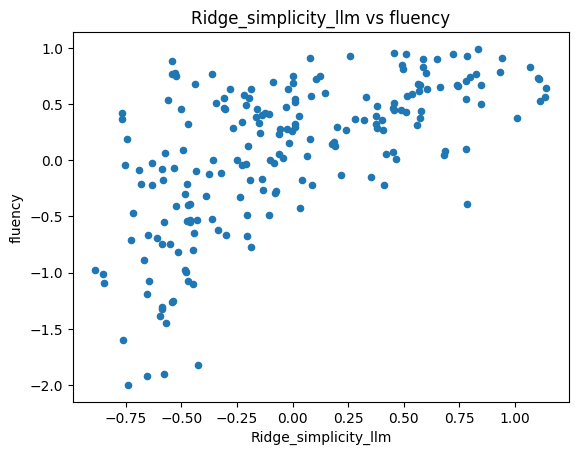

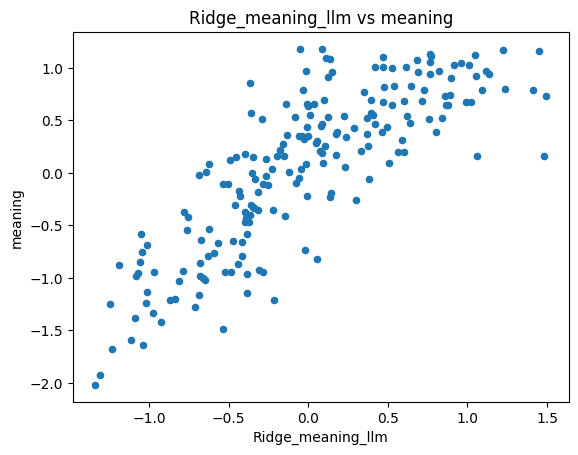

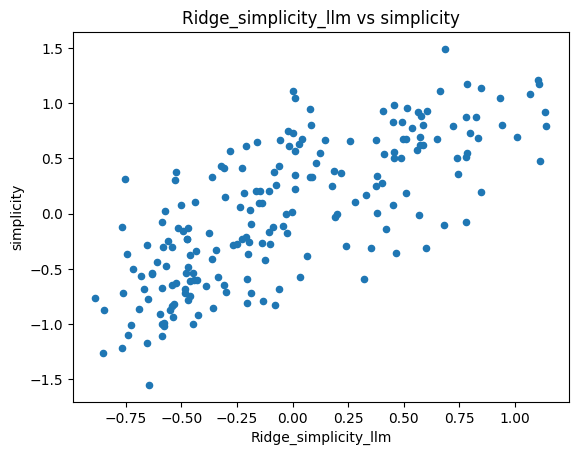

In [15]:
for target_column in dataset.target_columns:
    metric = get_top_metric_by_validation(dev, target_column, True)
    plot_metric_target_scatterplot(test, metric, target_column)
